<a href="https://colab.research.google.com/github/CyDevLabs/Underwater-Mine-Warfare-/blob/main/DAE_GrayScaled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train, Calculate loss & Create DAE module (.h5)**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/20
2/2 [==============================] - 7s 2s/step - loss: 0.0905
Epoch 2/20
2/2 [==============================] - 5s 2s/step - loss: 0.0657
Epoch 3/20
2/2 [==============================] - 6s 3s/step - loss: 0.0186
Epoch 4/20
2/2 [==============================] - 5s 2s/step - loss: 0.0328
Epoch 5/20
2/2 [==============================] - 5s 2s/step - loss: 0.0177
Epoch 6/20
2/2 [==============================] - 6s 2s/step - loss: 0.0123
Epoch 7/20
2/2 [==============================] - 5s 2s/step - loss: 0.0169
Epoch 8/20
2/2 [==============================] - 6s 2s/step - loss: 0.0083
Epoch 9/20
2/2 [==============================] - 5s 2s/step - loss: 0.0120
Epoch 10/20
2/2 [==============================] - 6s 3s/step - loss: 0.0099
Epoch 11/20
2/2 [==============================] - 5s 2s/step - loss: 0.0080
Epoch 12/20
2/2 [================

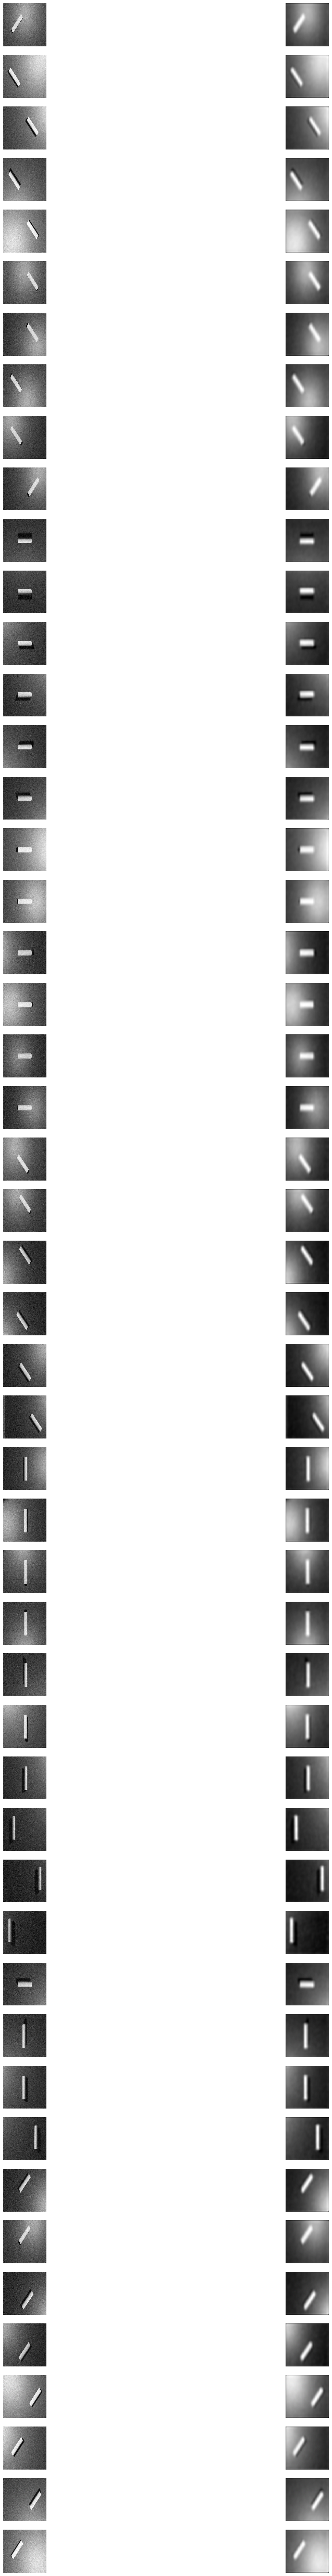

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the noisy images
noisy_images = []
for i in range(50):
    path = "/content/drive/MyDrive/Colab Notebooks/data/MinesGrayGN/" + "noisy_" + str(i) + ".png"
    colored_image = cv2.imread(path)
    grayscale_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
    noisy_image = cv2.resize(grayscale_image, (126, 126))
    noisy_images.append(noisy_image)

noisy_images = np.array(noisy_images)

# Reshape the input data to add the single channel dimension
noisy_images = np.expand_dims(noisy_images, axis=-1)

# Normalize the input data
noisy_images = noisy_images / 255.0

# Build the DAE model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(126, 126, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(1, (3,3), activation='relu', padding='same')
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the DAE
model.fit(noisy_images, noisy_images, epochs=20)

denoised_images = model.predict(noisy_images)

# Save the trained DAE model
model.save('/content/drive/MyDrive/Colab Notebooks/data/models/trained_dae_c2.h5')

fig, axs = plt.subplots(50, 2, figsize=(20, 100))

for i in range(50):
    axs[i, 0].imshow(noisy_images[i].squeeze(), cmap='gray')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(denoised_images[i].squeeze(), cmap='gray')
    axs[i, 1].axis('off')

plt.show()


# **Reconstruction with Operational images**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 70ms/step
Operational Image 1: MSE = 0.0013087901158053573
Operational Image 2: MSE = 0.01375513965862597
Operational Image 3: MSE = 0.002847052764181815
Operational Image 4: MSE = 0.009556908179595163
Operational Image 5: MSE = 0.002808591284637407
Operational Image 6: MSE = 0.00954510245636413
Operational Image 7: MSE = 0.002900778868313252
Operational Image 8: MSE = 0.009561924490596594
Operational Image 9: MSE = 0.0026048253884962146
Operational Image 10: MSE = 0.00955417382271087
Operational Image 11: MSE = 0.0025456302660427847
Operational Image 12: MSE = 0.009522561744550585
Operational Image 13: MSE = 0.0009880420354860069
Operational Image 14: MSE = 0.009526346469005348
Operational Image 15: MSE = 0.0010209352229117708
Operational Image 16: MSE = 0.009538519463147361
Operational Image 17: MSE = 0.001016930676

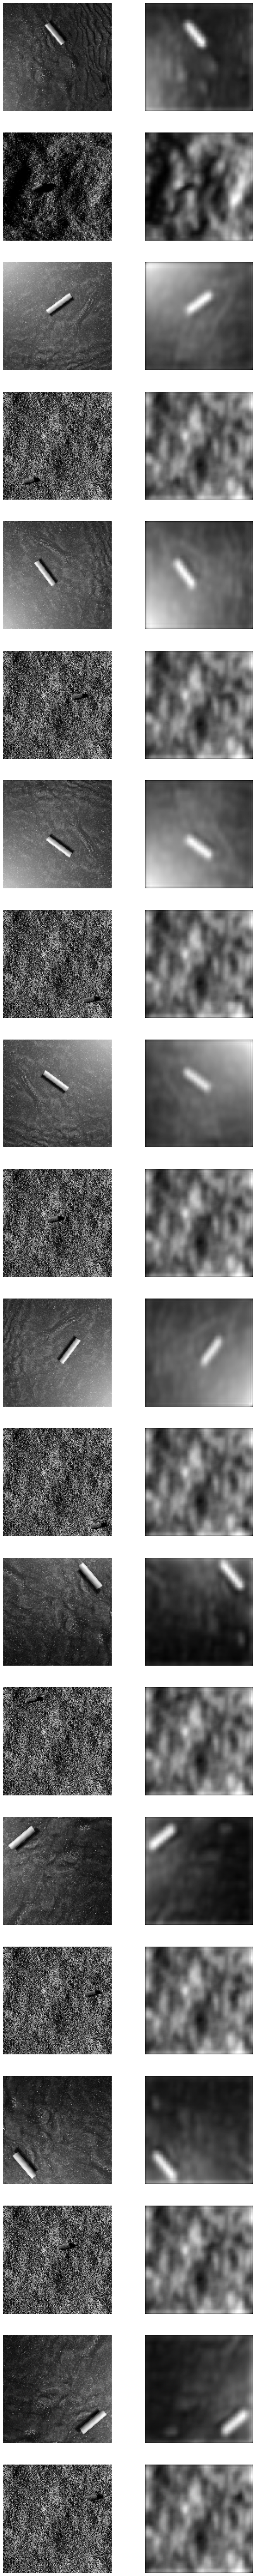

In [83]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the operational images
operational_images = []
for i in range(20):
    path = "/content/drive/MyDrive/Colab Notebooks/data/operationalimages/" + str(i) + ".png"
    colored_image = cv2.imread(path)
    grayscale_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
    operational_image = cv2.resize(grayscale_image, (126, 126))
    operational_images.append(operational_image)

operational_images = np.array(operational_images)

# Reshape the input data to add the single channel dimension
operational_images = np.expand_dims(operational_images, axis=-1)

# Normalize the operational images
operational_images = operational_images / 255.0

# Load the trained DAE
trained_dae = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/data/models/trained_dae_c2.h5')

# Compute reconstruction errors for each pixel
reconstruction_errors = []
for image in operational_images:
    reconstructed_image = trained_dae.predict(np.expand_dims(image, axis=0))
    mse = np.mean((image - reconstructed_image) ** 2)
    reconstruction_errors.append(mse)

# Display the MSE results
for i, mse in enumerate(reconstruction_errors):
    print(f"Operational Image {i+1}: MSE = {mse}")

# Plot the reconstructed images and their corresponding errors
fig, axs = plt.subplots(20, 2, figsize=(10, 100))

for i in range(20):
    axs[i, 0].imshow(operational_images[i].squeeze(), cmap='gray')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(trained_dae.predict(np.expand_dims(operational_images[i], axis=0))[0].squeeze(), cmap='gray')
    axs[i, 1].axis('off')

plt.show()


# **Validation Set**

In [92]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the validation images
validation_images = []
for i in range(20):
    path = "/content/drive/MyDrive/Colab Notebooks/data/validationimages/" + str(i) + ".png"
    colored_image = cv2.imread(path)
    grayscale_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
    validation_image = cv2.resize(grayscale_image, (126, 126))
    validation_images.append(validation_image)

validation_images = np.array(validation_images)

# Reshape the input data to add the single channel dimension
validation_images = np.expand_dims(validation_images, axis=-1)

# Normalize the validation images
validation_images = validation_images / 255.0

# Load the trained DAE
trained_dae = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/data/models/trained_dae_c2.h5')

# Compute reconstruction errors for each pixel
reconstruction_errors = []
for image in validation_images:
    reconstructed_image = trained_dae.predict(np.expand_dims(image, axis=0))
    mse = np.mean((image - reconstructed_image) ** 2)
    reconstruction_errors.append(mse)

reconstruction_errors = np.array(reconstruction_errors)  # Convert to NumPy array

# Print the results
for i in range(len(validation_images)):
    print(f"Validation Image {i+1}: MSE = {reconstruction_errors[i]}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 90ms/step
Validation Image 1: MSE = 0.013777429414302694
Validation Image 2: MSE = 0.0024796121397794766
Validation Image 3: MSE = 0.009556805337991461
Validation Image 4: MSE = 0.0013521976554359586
Validation Image 5: MSE = 0.009565094008644203
Validation Image 6: MSE = 0.0024796121397794766
Validation Image 7: MSE = 0.009557388598540804
Validation Image 8: MSE = 0.0012959835677302774
Validation Image 9: MSE = 0.009548590180241803
Validation Image 10: MSE = 0.002674486521277202
Validation Image 11: MSE = 0.009541404150644939
Validation Image 12: MSE = 0.0013142296554560413
Validation Image 13: MSE = 0.009562500289802767
Validation Image 14: MSE = 0.0027802616742709594
Validation Image 15: MSE = 0.009553691301109182
Validation Image 16: MSE = 0.0013397162850626568
Validation Image 17: MSE = 0.009555798176696583
Valid

# **Obtaining Global Minimum,Indices within Known MSE Range,Local Minimum**

In [85]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the operational images
operational_images = []
for i in range(20):
    path = "/content/drive/MyDrive/Colab Notebooks/data/operationalimages/" + str(i) + ".png"
    colored_image = cv2.imread(path)
    grayscale_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
    operational_image = cv2.resize(grayscale_image, (126, 126))
    operational_images.append(operational_image)

operational_images = np.array(operational_images)

# Reshape the input data to add the single channel dimension
operational_images = np.expand_dims(operational_images, axis=-1)

# Normalize the operational images
operational_images = operational_images / 255.0

# Load the trained DAE
trained_dae = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/data/models/trained_dae_c2.h5')

# Compute reconstruction errors for each pixel
reconstruction_errors = []
for image in operational_images:
    reconstructed_image = trained_dae.predict(np.expand_dims(image, axis=0))
    mse = np.mean((image - reconstructed_image) ** 2)
    reconstruction_errors.append(mse)

reconstruction_errors = np.array(reconstruction_errors)  # Convert to NumPy array

# Criteria 1: Global minimum
global_minimum = np.min(reconstruction_errors)
global_minimum_index = np.argmin(reconstruction_errors)

# Criteria 2: Known MSE range
validation_min = 0.0012834735631443491  # Minimum MSE value from the validation set
validation_max = 0.013777429414302694  # Maximum MSE value from the validation set
within_range_indices = np.where((reconstruction_errors >= validation_min) & (reconstruction_errors <= validation_max))[0]

# Criteria 3: Local minima
local_minima_indices = []
for i in range(1, len(reconstruction_errors) - 1):
    if reconstruction_errors[i] < reconstruction_errors[i-1] and reconstruction_errors[i] < reconstruction_errors[i+1]:
        local_minima_indices.append(i)

# Print the results
for i in range(len(operational_images)):
    print(f"Operational Image {i+1}: MSE = {reconstruction_errors[i]}")
print()
print("Criteria Results:")
print(f"Global Minimum: Operational Image {global_minimum_index+1}")
print("Indices within Known MSE Range:", within_range_indices)
print("Local Minima Indices:", local_minima_indices)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 123ms/step
Operational Image 1: MSE = 0.0013087901158053573
Operational Image 2: MSE = 0.01375513965862597
Operational Image 3: MSE = 0.002847052764181815
Operational Image 4: MSE = 0.009556908179595163
Operational Image 5: MSE = 0.002808591284637407
Operational Image 6: MSE = 0.00954510245636413
Operational Image 7: MSE = 0.002900778868313252
Operational Image 8: MSE = 0.009561924490596594
Operational Image 9: MSE = 0.0026048253884962146
Operational Image 10: MSE = 0.00955417382271087
Operational Image 11: MSE = 0.0025456302660427847
Operational Image 12: MSE = 0.009522561744550585
Operational Image 13: MSE = 0.0009880420354860069
Operational Image 14: MSE = 0.009526346469005348
Operational Image 15: MSE = 0.0010209352229117708
Operational Image 16: MSE = 0.009538519463147361
Operational Image 17: MSE = 0.00101693067

# **Obtaining Accumulated Heatmap with Labels**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 55ms/step


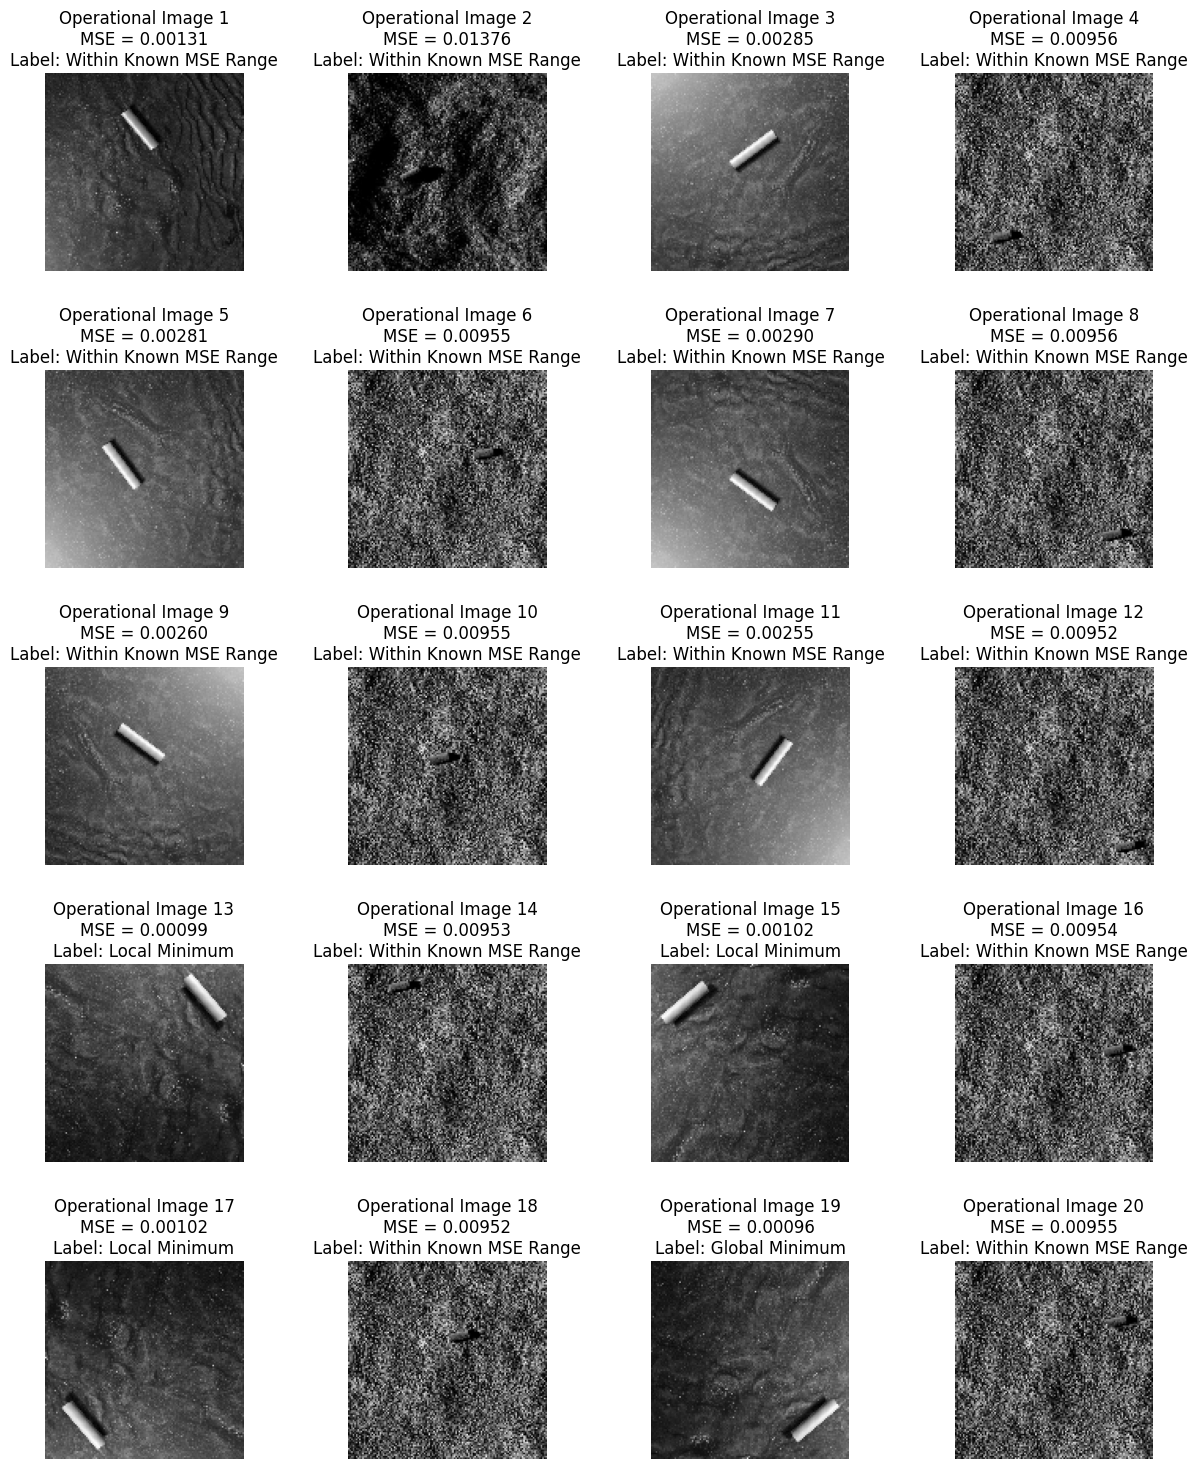

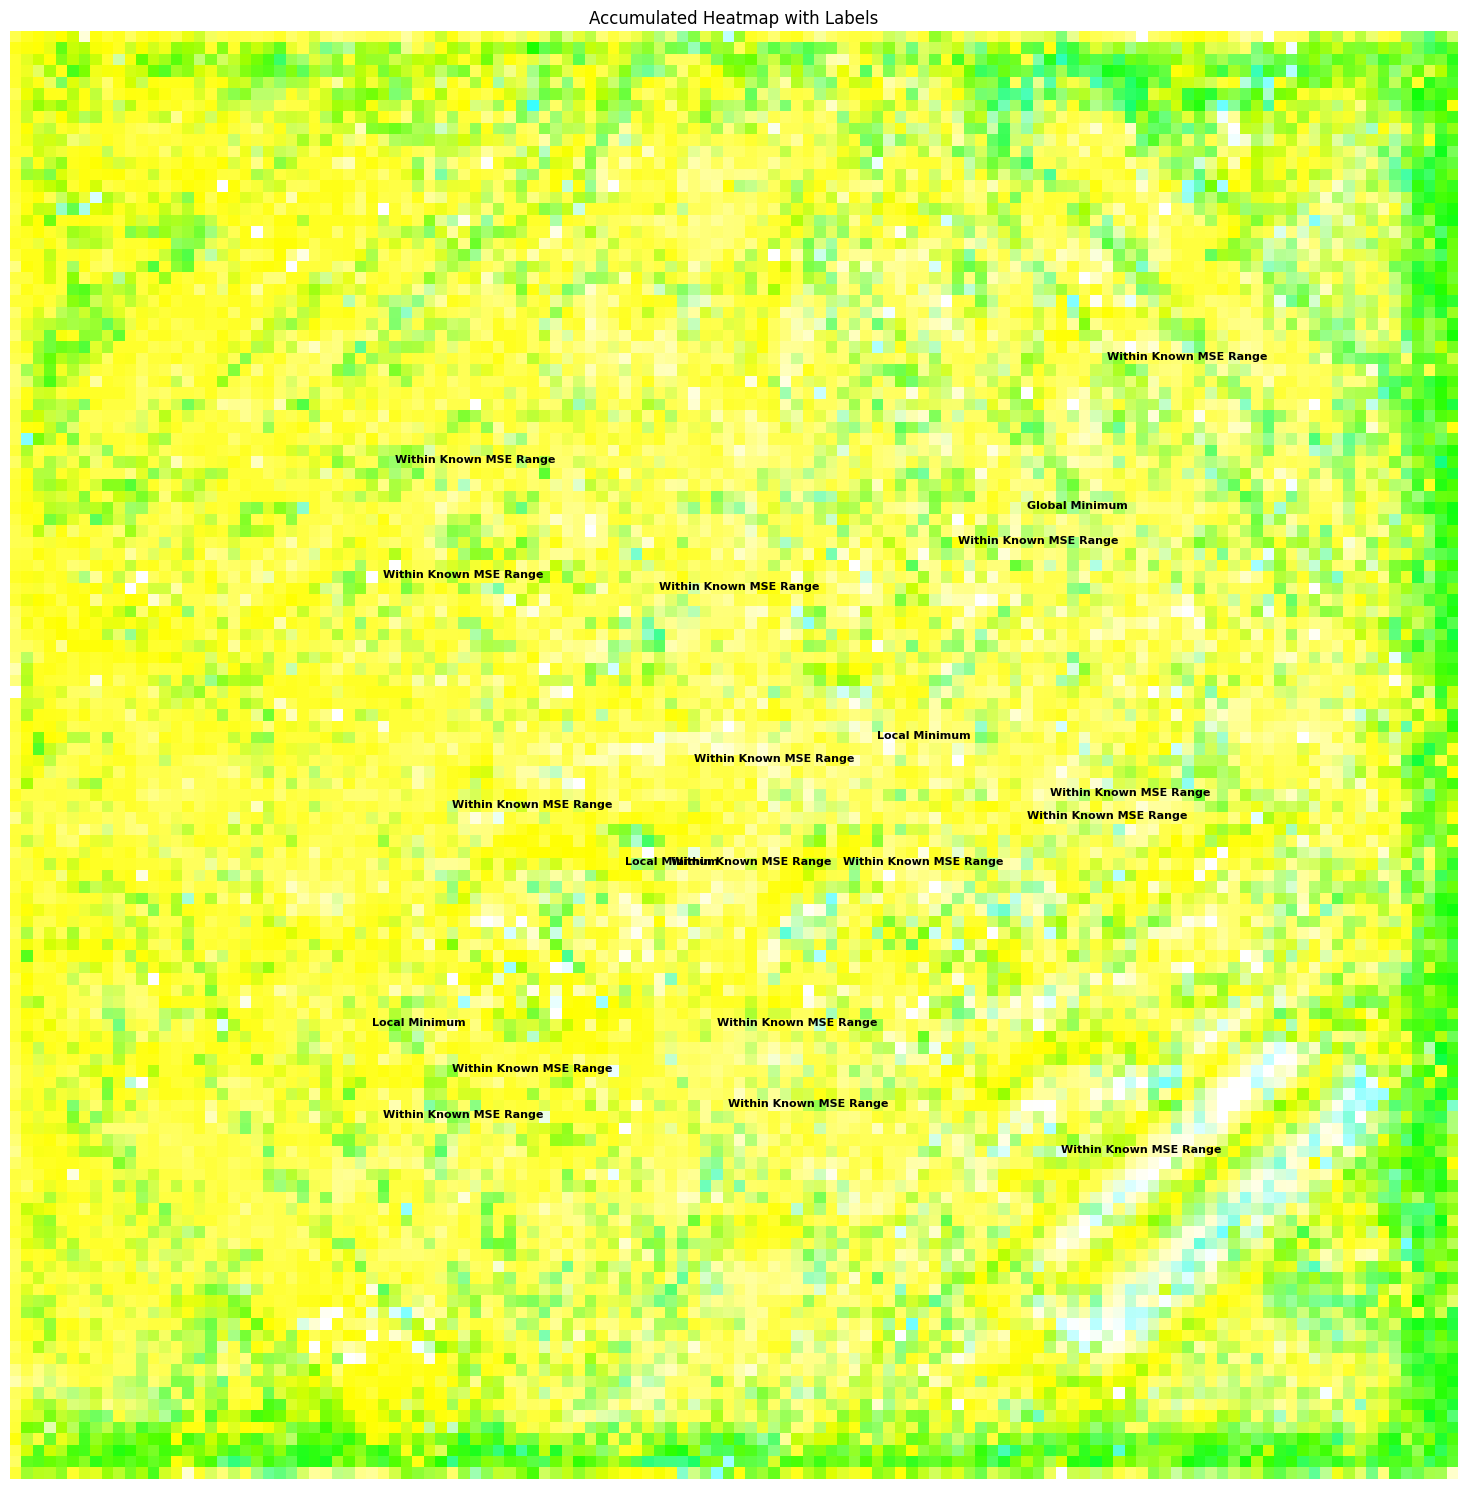

Criteria Results:
Global Minimum: Operational Image 19
Indices within Known MSE Range: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 15 17 19]
Local Minima Indices: [2, 4, 6, 8, 10, 12, 14, 16, 18]


In [86]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the operational images
operational_images = []
for i in range(20):
    path = "/content/drive/MyDrive/Colab Notebooks/data/operationalimages/" + str(i) + ".png"
    colored_image = cv2.imread(path)
    grayscale_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
    operational_image = cv2.resize(grayscale_image, (126, 126))
    operational_images.append(operational_image)

operational_images = np.array(operational_images)

# Reshape the input data to add the single channel dimension
operational_images = np.expand_dims(operational_images, axis=-1)

# Normalize the operational images
operational_images = operational_images / 255.0

# Load the trained DAE
trained_dae = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/data/models/trained_dae_c2.h5')

# Compute reconstruction errors for each pixel
reconstruction_errors = []
for image in operational_images:
    reconstructed_image = trained_dae.predict(np.expand_dims(image, axis=0))
    mse = np.mean((image - reconstructed_image) ** 2)
    reconstruction_errors.append(mse)

reconstruction_errors = np.array(reconstruction_errors)  # Convert to NumPy array

# Criteria
validation_min = 0.0012834735631443491  # Minimum MSE value from the validation set
validation_max = 0.013777429414302694  # Maximum MSE value from the validation set
global_min_index = np.argmin(reconstruction_errors)
within_range_indices = np.where((reconstruction_errors >= validation_min) & (reconstruction_errors <= validation_max))[0]
local_minima_indices = []
for i in range(1, len(reconstruction_errors) - 1):
    if reconstruction_errors[i] < reconstruction_errors[i-1] and reconstruction_errors[i] < reconstruction_errors[i+1]:
        local_minima_indices.append(i)

# Assign labels to different regions of the heatmap
labels = []
for i in range(len(operational_images)):
    mse = reconstruction_errors[i]
    if i == global_min_index:
        label = "Global Minimum"
    elif mse >= validation_min and mse <= validation_max:
        label = "Within Known MSE Range"
    elif i in local_minima_indices:
        label = "Local Minimum"
    else:
        label = "Other"
    labels.append(label)

# Display operational images and heatmaps with labels
fig, axs = plt.subplots(5, 4, figsize=(15, 18))
fig.subplots_adjust(hspace=0.5)
axs = axs.ravel()

heatmap = np.zeros((126, 126, 3))  # Initialize the heatmap

for i in range(len(operational_images)):
    axs[i].imshow(operational_images[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Operational Image {i+1}\nMSE = {reconstruction_errors[i]:.5f}\nLabel: {labels[i]}")

    # Generate heatmap for the current operational image
    predicted_image = trained_dae.predict(np.expand_dims(operational_images[i], axis=0))
    predicted_image = np.squeeze(predicted_image, axis=0)  # Remove the batch dimension
    predicted_image = predicted_image[:, :, :3]  # Keep only the RGB channels
    mse = np.mean(np.square(operational_images[i] - predicted_image))

    if i == global_min_index:
        color = (0, 0, 255)  # Red color for global minimum
        label_color = (255, 255, 255)  # White color for label text
    elif mse >= validation_min and mse <= validation_max:
        color = (0, 255, 0)  # Green color for within known MSE range
        label_color = (0, 0, 0)  # Black color for label text
    elif i in local_minima_indices:
        color = (255, 0, 0)  # Blue color for local minima
        label_color = (255, 0, 255)  # White color for label text
    else:
        color = (0, 0, 0)  # Black color for other regions
        label_color = (255, 255, 255)  # White color for label text

    heatmap += np.abs(operational_images[i] - predicted_image) * color

# Normalize the accumulated heatmap
heatmap /= len(operational_images)

# Create a larger figure for the heatmap
plt.figure(figsize=(15, 15))

# Display the heatmap with labels
plt.imshow(heatmap, cmap='coolwarm', vmin=0, vmax=1)
plt.axis('off')
plt.title("Accumulated Heatmap with Labels")

# Add labels to the heatmap
for i in range(len(operational_images)):
    label = labels[i]
    x = np.random.randint(30, 100)  # X-coordinate for label
    y = np.random.randint(20, 100)  # Y-coordinate for label
    plt.text(x, y, label, color=label_color, fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

print("Criteria Results:")
print(f"Global Minimum: Operational Image {global_min_index + 1}")
print("Indices within Known MSE Range:", within_range_indices)
print("Local Minima Indices:", local_minima_indices)


# **Evaluate the Model**

1/1 [==============================] - 0s 97ms/step
Epoch 1/5
2/2 [==============================] - 2s 191ms/step - loss: 1.2170 - accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 0s 216ms/step - loss: 0.6308 - accuracy: 0.7500
Epoch 3/5
2/2 [==============================] - 0s 187ms/step - loss: 0.5493 - accuracy: 0.7500
Epoch 4/5
2/2 [==============================] - 0s 216ms/step - loss: 0.5890 - accuracy: 0.7500
Epoch 5/5
1/1 [==============================] - 0s 204ms/step - loss: 0.2373 - accuracy: 1.0000
Test Loss: 0.23732851445674896
Test Accuracy: 1.0
1/1 [==============================] - 0s 94ms/step


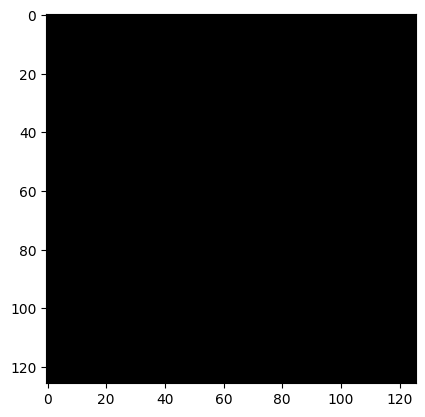

In [149]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the operational images
operational_images = []
for i in range(20):
    path = "/content/drive/MyDrive/Colab Notebooks/data/operationalimages/" + str(i) + ".png"
    colored_image = cv2.imread(path)
    grayscale_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
    operational_image = cv2.resize(grayscale_image, (126, 126))
    operational_images.append(operational_image)

operational_images = np.array(operational_images)

# Reshape the input data to add the single channel dimension
operational_images = np.expand_dims(operational_images, axis=-1)

# Normalize the operational images
operational_images = operational_images / 255.0

# Load the trained DAE
trained_dae = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/data/models/trained_dae_c2.h5')

# Compute reconstruction errors for each pixel
reconstruction_errors = []
for image in operational_images:
    reconstructed_image = trained_dae.predict(np.expand_dims(image, axis=0))
    mse = np.mean((image - reconstructed_image) ** 2)
    reconstruction_errors.append(mse)

reconstruction_errors = np.array(reconstruction_errors)  # Convert to NumPy array

# Criteria
validation_min = 0.0012834735631443491  # Minimum MSE value from the validation set
validation_max = 0.013777429414302694  # Maximum MSE value from the validation set
global_min_index = np.argmin(reconstruction_errors)
within_range_indices = np.where((reconstruction_errors >= validation_min) & (reconstruction_errors <= validation_max))[0]
local_minima_indices = []
for i in range(1, len(reconstruction_errors) - 1):
    if reconstruction_errors[i] < reconstruction_errors[i-1] and reconstruction_errors[i] < reconstruction_errors[i+1]:
        local_minima_indices.append(i)

# Assign labels to different regions of the heatmap
labels = []
for i in range(len(operational_images)):
    mse = reconstruction_errors[i]
    if i == global_min_index:
        label = "Global Minimum"
    elif mse >= validation_min and mse <= validation_max:
        label = "Within Known MSE Range"
    elif i in local_minima_indices:
        label = "Local Minimum"
    else:
        label = "Other"
    labels.append(label)

# Perform label encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(operational_images, encoded_labels, test_size=0.2, random_state=42)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(126, 126, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=8)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

path = "/content/drive/MyDrive/Colab Notebooks/data/operationalimages/21.png"
new_image = cv2.imread(path)
gray_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray_image, (126, 126))
input_image = np.expand_dims(resized_image, axis=-1)
input_image = np.expand_dims(input_image, axis=0)
input_image = input_image / 255.0

predictions = model.predict(input_image)

binary_image = np.zeros_like(resized_image)
threshold = 0.00012  # Adjust this threshold as needed
binary_image[predictions[0].argmax(axis=-1) >= threshold] = 255

plt.imshow(binary_image, cmap='gray')
plt.show()




# **F score on 2.png**

In [96]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the operational image 
path = "/content/drive/MyDrive/Colab Notebooks/data/operationalimages/2.png"
colored_image = cv2.imread(path)
grayscale_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
operational_image = cv2.resize(grayscale_image, (126, 126))

# Reshape the input data to add the single channel dimension
operational_image = np.expand_dims(operational_image, axis=-1)

# Normalize the operational image
operational_image = operational_image / 255.0

# Load the trained DAE
trained_dae = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/data/models/trained_dae_c2.h5')

# Compute the reconstruction error for the operational image
reconstructed_image = trained_dae.predict(np.expand_dims(operational_image, axis=0))
mse = np.mean((operational_image - reconstructed_image) ** 2)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(126, 126, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=8)

# Save the model weights
model.save_weights('/content/drive/MyDrive/Colab Notebooks/data/models/trained_model_weights.h5')

# Load the trained model weights
model.load_weights('/content/drive/MyDrive/Colab Notebooks/data/models/trained_model_weights.h5')

# Predict the label for the operational image
operational_image_pred = model.predict(np.expand_dims(operational_image, axis=0))
operational_image_pred_label = np.argmax(operational_image_pred)

# Calculate the F-score for the operational image
true_label = 1  # Set the true label for the operational image
f_score = calculate_f_score(true_label, operational_image_pred_label)

print('MSE:', mse)
print('F-score:', f_score)


1/1 [==============================] - 0s 207ms/step
Epoch 1/5
2/2 [==============================] - 2s 204ms/step - loss: 1.1841 - accuracy: 0.5625
Epoch 2/5
2/2 [==============================] - 0s 217ms/step - loss: 0.7647 - accuracy: 0.7500
Epoch 3/5
2/2 [==============================] - 0s 218ms/step - loss: 0.6473 - accuracy: 0.6250
Epoch 4/5
2/2 [==============================] - 0s 203ms/step - loss: 0.6937 - accuracy: 0.6875
Epoch 5/5
1/1 [==============================] - 0s 98ms/step
MSE: 0.002847052764181815
F-score: 1.0


# **Solution #1 based on the results, to improve pipeline**

1/1 [==============================] - 0s 140ms/step
MSE: 0.002484855286456905


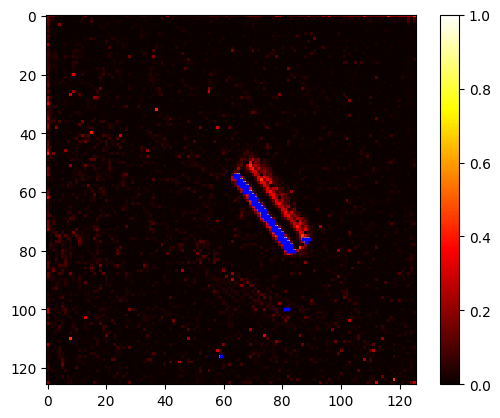

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the trained DAE model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/data/models/trained_dae_c2.h5')

# Load the input image
input_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/operationalimages/20.png', 0)  # Load the input image as grayscale
input_image = cv2.resize(input_image, (126, 126))  # Resize the input image to match the DAE input size
input_image = np.expand_dims(input_image, axis=-1)  # Add a single channel dimension
input_image = input_image / 255.0  # Normalize the input image

# Pass the input image through the DAE to obtain the reconstructed image
reconstructed_image = model.predict(np.array([input_image]))[0]


# Compute the Mean Squared Error (MSE) for each pixel
mse_map = np.mean((input_image - reconstructed_image) ** 2, axis=-1)

# Generate the heat map from the MSE map
heatmap = mse_map.copy()
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))  # Normalize the values to [0, 1]

# Print the MSE value
mse = np.mean(mse_map)
print("MSE:", mse)

# Plot the heat map
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.colorbar()

# Indicate the possible area where mines could exist based on the MSE values
threshold = 0.06512  # Adjust threshold value 0.06512
mines_area = np.where(mse_map > threshold)
plt.plot(mines_area[1], mines_area[0], 'bo', markersize=2)

plt.show()
